In [2]:
import seaborn as sns

%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

<H3>Importing train and test data kept on cloud in same path as the notebook</H3>

In [4]:
# The code was removed by Watson Studio for sharing.

In [5]:
df.head()  #train data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,6.0,Unavailable,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07
1,10.0,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00
2,2.0,Ready To Move,Uttarahalli,3.0,u,1440.0,2.0,3.0,62.00
3,6.0,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,6.0,Ready To Move,Kothanur,2.0,u,1200.0,2.0,1.0,51.00


In [6]:
df1.head()  #test data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,6.0,Ready To Move,Brookefield,2.0,Roeekbl,1225.0,2.0,2.0,NaN
1,10.0,Ready To Move,Akshaya Nagar,9.0,u,2400.0,9.0,2.0,NaN
2,10.0,Unavailable,Hennur Road,4.0,Saandtt,1650.0,5.0,2.0,NaN
3,6.0,Ready To Move,Kodichikkanahalli,3.0,Winerri,1322.0,3.0,1.0,NaN
4,6.0,Ready To Move,Konanakunte,2.0,AmageSa,1161.0,2.0,1.0,NaN


In [7]:
df.shape


(13373, 9)

<H4>By looking at first rows i found out that the column society contains can be dropped as it is deficit in data. Also availability is of no use in predicting prices</H4>
<H4>1. Moreover if we prefer deleting rows where Society value = NaN or Null, most of the data will be lost thus columnn dropping seems better idea</H4>
<H4>2. Also it contains string values and it will be beneficial to drop it</H4>

In [8]:
#df.head(300)
df.drop(['society'], 1, inplace=True)
df.drop(['availability'],1, inplace=True)

df1.drop(['society', 'availability', 'price'], 1, inplace=True)

In [9]:
df.head(3)

,area_type,location,size,total_sqft,bath,balcony,price
0,6.0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,10.0,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,2.0,Uttarahalli,3.0,1440.0,2.0,3.0,62.00


In [10]:
df.describe()

,area_type,size,total_sqft,bath,balcony,price
count,13320.000000,13320.000000,1.332000e+04,13320.000000,13320.000000,13320.000000
mean,5.888514,2.800375,1.924474e+03,2.677853,1.511937,112.565627
std,2.308991,1.297835,1.838166e+04,1.352467,0.864240,148.971674
min,2.000000,0.000000,1.000000e+00,0.000000,0.000000,8.000000
25%,6.000000,2.000000,1.100000e+03,2.000000,1.000000,50.000000
50%,6.000000,3.000000,1.275000e+03,2.000000,2.000000,72.000000
75%,6.000000,3.000000,1.680000e+03,3.000000,2.000000,120.000000
max,10.000000,43.000000,1.336500e+06,40.000000,3.000000,3600.000000


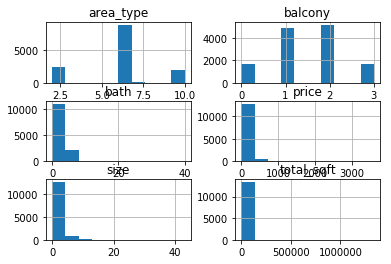

In [11]:
viz = df[['area_type','size','total_sqft','bath','balcony','price']]
viz.hist()
plt.show()

In [13]:
! conda install "plotly"

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    plotly-4.7.1               |             py_0         4.7 MB

The following packages will be UPDATED:

    plotly: 3.6.1-py36_0 --> 4.7.1-py_0


plotly-4.7.1         | 4.7 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [21]:
df.info()      #total rows are 13373

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13373 entries, 0 to 13372
Data columns (total 7 columns):
area_type     13320 non-null float64
location      13372 non-null object
size          13320 non-null float64
total_sqft    13320 non-null float64
bath          13320 non-null float64
balcony       13320 non-null float64
price         13320 non-null float64
dtypes: float64(6), object(1)
memory usage: 731.4+ KB


In [22]:
df.isnull().sum()# this tells us how many rows contain null or no value for each column

area_type     53
location       1
size          53
total_sqft    53
bath          53
balcony       53
price         53
dtype: int64

In [23]:
df.tail(2)   # here we observe the data at end contains only location value, i used hit and trial to see last 54 rows

,area_type,location,size,total_sqft,bath,balcony,price
13371,NaN,Kalidasa Layout,NaN,NaN,NaN,NaN,NaN
13372,NaN,Muni reddy layout,NaN,NaN,NaN,NaN,NaN


In [24]:
df = pd.get_dummies(data=df, columns=['location']) # converting categorical values to quatitative values
df1 = pd.get_dummies(data=df1, columns=['location'])

In [25]:
df = df.dropna(axis=0)
df1 = df1.dropna(axis=0) # removing all the rows which contain null or no values
df.shape

(13320, 1364)

In [31]:
X = np.array(df.drop(['price'], 1)) #predictor variable used to predict 
y = np.array(df['price']) #target variable which we need to calculate
#y = 1 - np.log(y)

In [32]:
X_test = np.array(df1) # test data given to find output

In [34]:

# n=250, max_depth=15, min_samples_split=30, learning_rate=0.1, max_features =150,
# subsample 0.94, max_leaf_nodes=41.
clf1 = GradientBoostingRegressor(n_estimators=500, max_depth = 15, min_samples_split = 30,
                                 learning_rate = 0.1, max_features=5, subsample = 0.94, 
                                 random_state=3, max_leaf_nodes=41)

# fit the trained model to the dataset
clf1.fit(X,y)

# Now predict the price values in the test dataset.
prediction = clf1.predict(X_test)
#actual_prediction = np.exp(1-prediction)
df4=pd.DataFrame(prediction)
#df4.to_csv('final_output7_house_price.csv')
df4

,0
0,61.299316
1,222.305081
2,230.642676
3,79.797182
4,82.251173
5,168.061852
6,319.916348
7,69.037434
8,95.419245
9,123.273615


In [35]:
prediction = clf1.predict(X)
#actual_prediction = np.exp(1-prediction)
df5=pd.DataFrame(prediction)
df5

,0
0,36.817392
1,176.634912
2,55.936217
3,98.801218
4,52.458492
5,48.545697
6,234.476812
7,461.159538
8,92.976956
9,270.401465
